2.8294416132344304
[2000, 360, 254.64974519109873, 0.0, 0, 0, 0, 0, 0]
[0.0, 0.059660088923645785, 0.09764115502985751, 0.09764115502985751, 0.09764115502985751, 0.10509866614531324, 0.4033991107635422, 0.9403399110763542, 1.0]


<IPython.core.display.Javascript object>


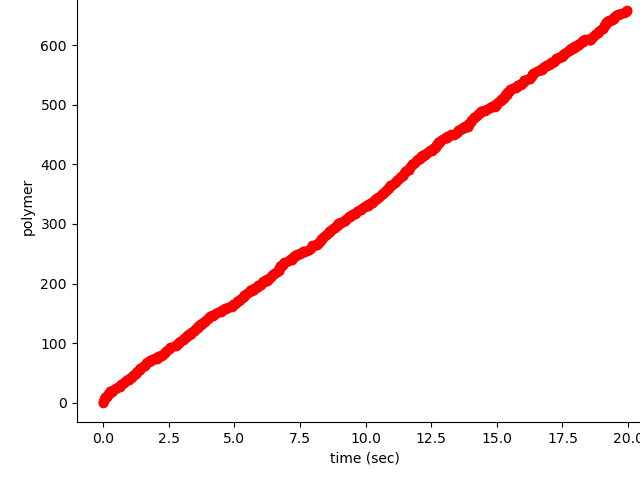

Text(0, 0.5, 'polymer')

In [2]:
import numpy as np
import math
import random
import matplotlib
matplotlib.use('tkagg')
import matplotlib.pyplot as plt

# first we set all of the rate constants
k1 = 20     # PA binding to membrane sites to form MPA
k2 = 40     # PA dissociating from membrane sites
k3 = 0.008     # MPA binding to filament end (in untis of um-2sec-1)
k4 = 1.3       # MPA dissociating from MPAF complex
k5 = 100    # conformational change from MPAF to MPF
k6 = 5      # reverse conform. change from MPF to MPAF
k7 = 200       # filament dissociating from MPF
k8 = 5         # filament binding back to MP
k9 = 5     # dissociation of P from membrane site M

# correct the rate constant k3 for the area accessible to filament ends
# N.B. the effective membrane area is difficult to estimate. If we base
# the estimate on thermal fluctuations of the filament, we need to assume
# an average filament length and then calculate the average deflection
# of the filament tip from its equilibrium position. We take this
# deflection to be the radius of the circle accessible to the filament tip.
# for a 300 nm filament (~100 monomers) let's ballpark a 30 nm avg. deflection
# Aftd - average filament tip deflection
# Sf - area 'searched' by filament tip
Aftd = 0.03    # expressed in um
Sf = 3.14157*(Aftd*Aftd)
k3 = k3/Sf
print(k3)

# initialize all the dynamical variables
M = 10      # free membrane sites (number) within range of filaments
PA = 100    # profilin-actin (uM)
MPA = 0     # membrane bound profilin-actin (number)
MPAF = 0    # membrane bound profilin-actin-filament (number)
MPF =  0    # membrane bound profilin-filament (number)
MP = 0      # membrane bound profilin (number) in range of filaments
F = 10      # free filaments

# calculate the initial occupancy of the membrane sites based on affinity
Kmd = k2/k1 # this is the Kd for PA binding to M
MPA = math.floor((M*PA)/(Kmd+PA))
M = M-MPA

Ptot = [0]  # array to hold the total amount of polymer
time = 0    # variable to hold the current time
t = [0]     # array to hold sampled time points
tend = 20   # end timepoint

# initialize variables to count the number of additions and 
# subtractions from the polymerized actin pool
deltaP = 0
deltaPmax = 100
 
while time < tend:
        # compute the current rates and put them into a vector
        rates = [ k1*M*PA,
                  k2*MPA,
                  k3*MPA*F,
                  k4*MPAF,
                  k5*MPAF,
                  k6*MPF,
                  k7*MPF,
                  k8*MP*F,
                  k9*MP,                
                  ]
        if time==0:
            print(rates)

        # calculate the sum of all reaction rates
        rate_sum = sum(rates)
        if rate_sum == 0:
                break
        # normalize all the reaction rates
        rates[:] = [x / rate_sum for x in rates]
        # stairstep the normalized reaction rates from 0 - 1
        for i in range(1,9):
            rates[i]=rates[i]+rates[i-1]
                      
        # based on the summed rates, calculate the time increment for this reaction        
        tau = np.random.exponential(scale=1/rate_sum)  #random draw from an exponential distribution
        # increment the running timer with the new time step
        time = time + tau
        
        if time>=tend:
            print(rates)
            
        # roll the dice to choose the reaction that will occur in this time step
        rand = random.uniform(0,1) #choose next event

        # run through all the choices
        if rand <= rates[0]:
                M = M - 1
                MPA = MPA + 1

        elif rand <= rates[1]:
                MPA = MPA - 1
                M = M + 1

        elif rand <= rates[2]:
                MPA = MPA - 1
                F = F - 1
                MPAF = MPAF +1

        elif rand <= rates[3]:
                MPAF = MPAF - 1
                MPA = MPA + 1
                F = F + 1

        elif rand <= rates[4]:
                MPAF = MPAF - 1
                MPF = MPF + 1
                # if we add to the polymer increment Ptot and take snapshot
                Ptot.append(Ptot[-1] + 1)
                t.append(time)

        elif rand <= rates[5]:
                MPF = MPF - 1
                MPAF = MPAF + 1 
                # if we subtract from the polymer decrement Ptot and take snapshot
                Ptot.append(Ptot[-1] - 1)
                t.append(time)

        elif rand <= rates[6]:
                MPF = MPF -1
                MP = MP + 1
                F = F + 1

        elif rand <= rates[7]:
                MP = MP - 1
                MPF = MPF + 1
                F = F - 1

        else:
                MP = MP -1
                M = M + 1

%matplotlib notebook
fig=plt.figure()
ax=fig.add_axes([0.12,0.12,0.9,0.9])
ax.plot(t,Ptot,'ro')
ax.set_title("total polymer")
ax.set_xlabel("time (sec)")
ax.set_ylabel( "polymer")

In [7]:
import math

for x in range(9):
    print(x)
y=math.floor(8/3)
print(y)

0
1
2
3
4
5
6
7
8
2
